In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name !='/device:GPU:0':
  raise SystemError("Gpu not")
print('Gpu found at {} '.format(device_name))

Gpu found at /device:GPU:0 


In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Nov 27 00:23:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   28C    P0    48W / 400W |    632MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import pickle

In [5]:
%cd /content/gdrive/MyDrive/Master/Fall 22/DS Project/CornDataSet
!ls

/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
 MobileNet_UfR_0-50_100epoch_1fold_no_accuracyGraph.png
 MobileNet_UfR_0-50_100epoch_1fold_no_LossGraph.png
 MobileNet_UfR_0-50_100epoch_2fold_no_accuracyGraph.png
 MobileNet_UfR_0-50_100epoch_2fold_no_LossGraph.png
 MobileNet_UfR_0-50_100epoch_3fold_no_accuracyGraph.png
 MobileNet_UfR_0-50_100epoch_3fold_no_LossGraph.png
 MobileNet_UfR_0-50_100epoch_4fold_no_accuracyGraph.png
 MobileNet_UfR_0-50_100epoch_4fold_no_LossGraph.png
 MobileNet_UfR_0-50_100epoch_5fold_no_accuracyGraph.png
 MobileNet_UfR_0-50_100epoch_5fold_no_LossGraph.png
'MobileNet_UfR_0-50_Kfold_history_[   0    1    2 ... 3076 3077 3079]_fold_2.csv'
'MobileNet_UfR_0-50_Kfold_history_[   0    1    2 ... 3077 3078 3079]_fold_3.csv'
'MobileNet_UfR_0-50_Kfold_history_[   0    1    3 ... 3077 3078 3079]_fold_4.csv'
'MobileNet_UfR_0-50_Kfold_history_[   0    2    3 ... 3076 3078 3079]_fold_1.csv'
'MobileNet_UfR_0-50_

In [6]:
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

pickle_in = open("Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

In [7]:
import numpy as np
image_size = 224
IMG_SHAPE = (image_size, image_size, 3)
y = np.array(Y_train)

In [8]:
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import KFold, cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import classification_report
from keras.layers.core import Dense, Flatten
from keras.applications import vgg16
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import Adam


import matplotlib.pyplot as plt
import keras.optimizers
import numpy as np
import pandas as pd
import os
from keras import optimizers
from keras.models import Sequential
from keras.layers import Activation, GlobalAveragePooling2D,Dropout
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping
import keras.optimizers
from sklearn.metrics import classification_report
import keras.optimizers
from keras.applications import mobilenet_v2
from keras.layers import Input
import numpy as np
from keras import Model
import tensorflow as tf

In [9]:
def plotGraphs(history,fold_no,epochs):
  %cd '/content/gdrive/MyDrive/Graphs/'
 #summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f'{fold_no} model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(f'MobileNet_UfR_0-75_{epochs}epoch_{fold_no}fold_no_accuracyGraph.png')
  plt.show()
  #summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(f'{fold_no} model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(f'MobileNet_UfR_0-75_{epochs}epoch_{fold_no}fold_no_LossGraph.png')
  plt.show()

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/100
73/73 [==============================] - 15s 36ms/step - loss: 0.3831 - accuracy: 0.8398 - val_loss: 20.8028 - val_accuracy: 0.2896
Epoch 2/100
73/73 [==============================] - 1s 20ms/step - loss: 0.2545 - accuracy: 0.8939 - val_loss: 8.1262 - val_accuracy: 0.2766
Epoch 3/100
73/73 [==============================] - 1s 20ms/step - loss: 0.1949 - accuracy: 0.9190 - val_loss: 3.4728 - val_accuracy: 0.7857
Epoch 4/100
73/73 [==============================] - 1s 19ms/step - loss: 0.1335 - accuracy: 0.9494 - val_loss: 2.6266 - val_accuracy: 0.7351
Epoch 5/100
73/73 [==============================] - 1s 20ms/step - loss: 0.1293 - accuracy: 0.9545 - val_loss: 11.6811 - val_accuracy: 0.2948
Epoch 6/100
73/73 [==============================] - 1s 20ms/step - loss: 0.0544 - accuracy: 0.9814 - val_loss: 8.3188 - val_accuracy: 0.4532
Epoch 7/100
73/73 [==============================] - 1s 19ms/step - loss: 0.0921 -

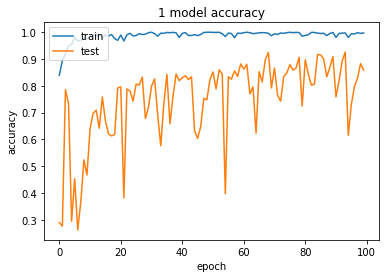

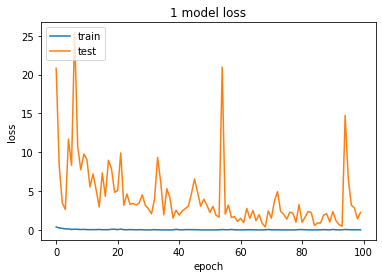

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogsMobileNet_UfR_0-75_[   0    1    2 ... 3077 3078 3079]_epochs_100/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 1: loss of 1.3220824003219604; accuracy of 89.61039185523987%
49/49 [==============================] - 2s 16ms/step
Classification report on Training data fold-1:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       928
           1       1.00      1.00      1.00       954
           2       1.00      0.18      0.31       410
           3       0.70      0.99      0.82       788

    accuracy                           0.89      3080
   macro avg       0.92      0.79      0.78      3080
weighted avg       0.92      0.89      0.86      3080

13/13 [==============================] - 0s 24ms/step
Classification report on Test data:-1
              precision    recall  f1-

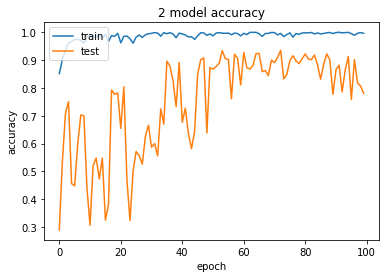

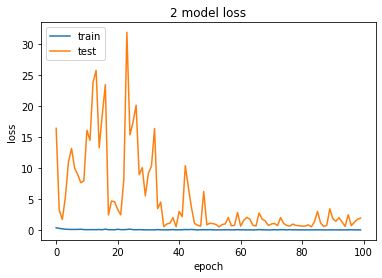

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogsMobileNet_UfR_0-75_[   0    1    4 ... 3077 3078 3079]_epochs_100/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 2: loss of 1.5491684675216675; accuracy of 77.11039185523987%
49/49 [==============================] - 2s 17ms/step
Classification report on Training data fold-2:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       928
           1       1.00      0.97      0.99       954
           2       0.40      1.00      0.57       410
           3       1.00      0.26      0.41       788

    accuracy                           0.80      3080
   macro avg       0.85      0.80      0.74      3080
weighted avg       0.92      0.80      0.78      3080

13/13 [==============================] - 0s 16ms/step
Classification report on Test data:-2
              precision    recall  f1-

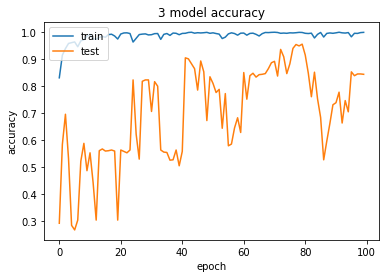

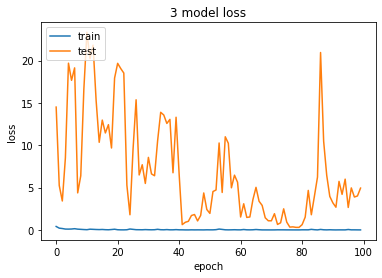

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogsMobileNet_UfR_0-75_[   0    1    2 ... 3076 3077 3079]_epochs_100/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 3: loss of 4.080342769622803; accuracy of 84.57792401313782%
49/49 [==============================] - 2s 16ms/step
Classification report on Training data fold-3:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       928
           1       1.00      0.99      0.99       954
           2       1.00      0.02      0.05       410
           3       0.66      1.00      0.79       788

    accuracy                           0.87      3080
   macro avg       0.91      0.75      0.71      3080
weighted avg       0.91      0.87      0.82      3080

13/13 [==============================] - 0s 17ms/step
Classification report on Test data:-3
              precision    recall  f1-s

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/100
73/73 [==============================] - 5s 33ms/step - loss: 0.3978 - accuracy: 0.8316 - val_loss: 28.4353 - val_accuracy: 0.2896
Epoch 2/100
73/73 [==============================] - 1s 20ms/step - loss: 0.2479 - accuracy: 0.9000 - val_loss: 6.2720 - val_accuracy: 0.4208
Epoch 3/100
73/73 [==============================] - 1s 20ms/step - loss: 0.1777 - accuracy: 0.9307 - val_loss: 6.5765 - val_accuracy: 0.5221
Epoch 4/100
73/73 [==============================] - 1s 20ms/step - loss: 0.1354 - accuracy: 0.9519 - val_loss: 14.7991 - val_accuracy: 0.3377
Epoch 5/100
73/73 [==============================] - 1s 20ms/step - loss: 0.1031 - accuracy: 0.9602 - val_loss: 15.8390 - val_accuracy: 0.1610
Epoch 6/100
73/73 [==============================] - 1s 20ms/step - loss: 0.0576 - accuracy: 0.9801 - val_loss: 12.6299 - val_accuracy: 0.5000
Epoch 7/100
73/73 [==============================] - 1s 20ms/step - loss: 0.0639 - accuracy: 0.9801 - val_loss: 14.6013 - val_accuracy: 0.5974
E

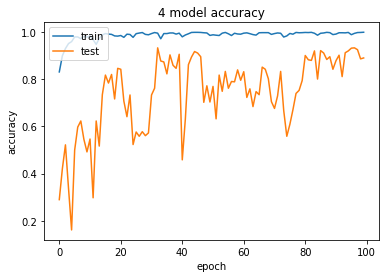

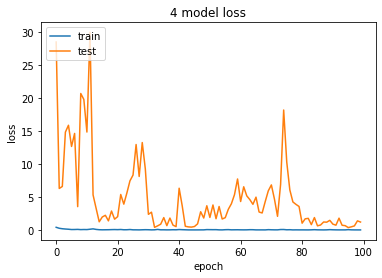

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogsMobileNet_UfR_0-75_[   2    3    4 ... 3076 3077 3078]_epochs_100/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 4: loss of 0.2519095242023468; accuracy of 96.42857313156128%
49/49 [==============================] - 2s 17ms/step
Classification report on Training data fold-4:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       928
           1       1.00      0.99      1.00       954
           2       1.00      0.77      0.87       410
           3       0.87      1.00      0.93       788

    accuracy                           0.96      3080
   macro avg       0.97      0.93      0.95      3080
weighted avg       0.96      0.96      0.96      3080

13/13 [==============================] - 0s 16ms/step
Classification report on Test data:-4
              precision    recall  f1-

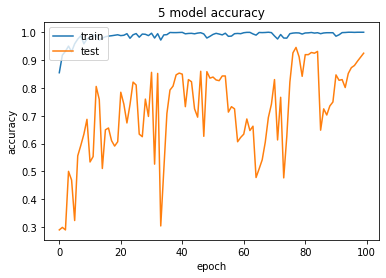

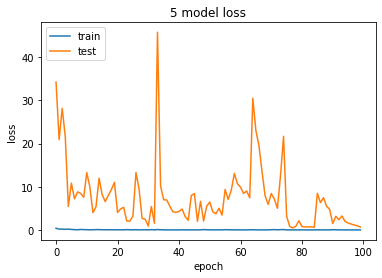

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogsMobileNet_UfR_0-75_[   0    1    2 ... 3076 3078 3079]_epochs_100/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 5: loss of 0.05742938816547394; accuracy of 98.53895902633667%
49/49 [==============================] - 2s 16ms/step
Classification report on Training data fold-5:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       928
           1       1.00      1.00      1.00       954
           2       0.99      0.88      0.93       410
           3       0.96      0.98      0.97       788

    accuracy                           0.98      3080
   macro avg       0.98      0.96      0.97      3080
weighted avg       0.98      0.98      0.98      3080

13/13 [==============================] - 0s 16ms/step
Classification report on Test data:-5
              precision    recall  f1

In [10]:
inputs = X_train
targets = y
acc_per_fold = []
loss_per_fold = []
num_folds = 5
epochs = 100
train = 50

kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train, test in kfold.split(inputs, targets):
  base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

  CLASSES = 4
  x = base_model.output
  x = GlobalAveragePooling2D(name='avg_pool')(x)
  x = Dropout(0.4)(x)
  predictions = Dense(CLASSES, activation='softmax')(x)
  model = Model(inputs=base_model.input, outputs=predictions)

  for layer in model.layers[0:110]:
    layer.trainable = False  # should be False

  for layer in model.layers[110:]:
    layer.trainable = True  # should be True

  optm = optimizers.Adam(learning_rate=0.001)    
  model.compile(loss='sparse_categorical_crossentropy',
              optimizer= optm,
              metrics=['accuracy']
              )
  
  #logs = f'/content/gdrive/MyDrive/Colab Notebooks/Logs/MobileNet_Kfold/fold_no_{fold_no}/'
  
  logs = f'/content/gdrive/MyDrive/Logs/MobileNet_Kfold/MobileNet_UfR_0-75_fold_no_{fold_no}/'

  
  history = model.fit(inputs, targets, batch_size=32, epochs=epochs, validation_split=0.25, callbacks= [TensorBoard
                          (log_dir=logs , histogram_freq=0,
                          write_graph=True, write_images=False)],
                          use_multiprocessing=True)
  
  plotGraphs(history,fold_no,epochs)
  
  %cd f'/content/gdrive/MyDrive/Logs/ExcelLogsMobileNet_UfR_0-75_{train}_epochs_{epochs}/'
  hist_df = pd.DataFrame(history.history)  
  hist_csv_file = f'MobileNet_UfR_0-75_Kfold_history_{train}_fold_{fold_no}.csv'
  with open(hist_csv_file, mode='w') as f:
      hist_df.to_csv(f)

  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  y_train_pred = model.predict(X_train, batch_size=64, verbose=1)
  y_train_pred_bool = np.argmax(y_train_pred, axis=1)
  print(f"Classification report on Training data fold-{fold_no}:")
  print(classification_report(y, y_train_pred_bool))

  y_pred = model.predict(X_test, batch_size=64, verbose=1)
  y_pred_bool = np.argmax(y_pred, axis=1)
  print(f"Classification report on Test data:-{fold_no}")
  print(classification_report(Y_test, y_pred_bool))

  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Validation Loss: {loss_per_fold[i]} - Validation Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------') 

In [ ]:
# freezing 25% of the bottom layers